In [1]:
# Install necessary libraries if not already installed
# pip install wordcloud matplotlib

import fitz  # PyMuPDF
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.util import ngrams

In [2]:
# Download required NLTK data files (run once)
nltk.download('wordnet')
nltk.download('omw-1.4')  # for better lemmatization
nltk.download('averaged_perceptron_tagger')  # for POS tagging
nltk.download('averaged_perceptron_tagger_eng')  # for POS tagging

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
# Map NLTK POS tags to WordNet POS tags for better lemmatization
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

In [4]:
#text = "Blockchain is a decentralized digital ledger that records transactions across multiple computers, ensuring transparency and security without the need for a central authority. Each block in the chain contains a list of transactions, a timestamp, and a cryptographic hash of the previous block, linking them securely. This structure makes blockchain resistant to data tampering, as altering one block would require changing all subsequent ones. Initially developed for Bitcoin, blockchain technology now has applications beyond cryptocurrencies, including supply chain management, voting systems, healthcare, and finance. Its ability to provide trust, transparency, and efficiency makes it a transformative force in the digital age."

In [5]:
# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

In [6]:
## Read the PDF file

file_path= r'D:\Personal\Resume\Latest Resume\KunalPKelkar_CV.pdf'

In [7]:
# Extract text
text = extract_text_from_pdf(file_path)

In [8]:
# Preprocess text: lowercase, remove non-alphabetic characters
words = re.findall(r'\b[a-zA-Z]{2,}\b', text.lower())

In [9]:
# POS tagging for lemmatization
pos_tags = nltk.pos_tag(words)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize words with POS tags
lemmatized_words = [
    lemmatizer.lemmatize(word, get_wordnet_pos(pos))
    for word, pos in pos_tags
]

In [10]:
# Default stopwords from wordcloud
default_stopwords = set(STOPWORDS)

# Additional stopwords you want to remove
additional_stopwords = {'experience', 'skills', 'education', 'project', 'work', 'responsible','sas',
                        'enablement','partner','india','ltd','team','use','tool','sa','mar','end','pvt','across','consultant','time','si','include'}

# Combine both sets
all_stopwords = default_stopwords.union(additional_stopwords)

filtered_words = [word for word in lemmatized_words if word not in all_stopwords]

In [11]:
# Generate unigrams and bigrams
unigrams = filtered_words
bigrams = [' '.join(bg) for bg in ngrams(filtered_words, 2)]

# Combine and count frequencies
all_terms = unigrams + bigrams
term_frequencies = Counter(all_terms)

In [12]:
#word_counts = Counter(filtered_words)

# Define frequency thresholds
min_freq = 4  # drop words that appear less than this
max_freq = 100  # drop words that appear more than this

# Filter based on word count thresholds
filtered_frequencies = {
    term: freq for term, freq in term_frequencies.items() if min_freq <= freq <= max_freq
}


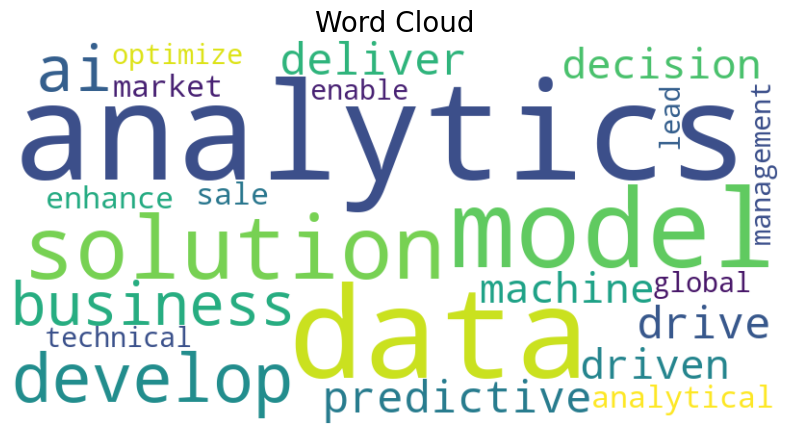

In [13]:
# Generate the word cloud
#wordcloud = WordCloud(width=800, height=400, stopwords=custom_stopwords,background_color='white').generate(text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_frequencies)

wordcloud.to_file(r"D:\Personal\wordcloud_resume.png")

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize=20)
plt.show()